##  Plasma calculations with PlasmaPy

This notebook shows how to calculate various plasma parameters (Alfvén speed, plasma beta, Debye length, etc.) with MMS data and the PlasmaPy package. 


This command sets up the PySPEDAS environment when running in Google Colab.  You can skip it or comment it out if you're running this notebook in an environment that already has PySPEDAS installed.


In [1]:
!pip install pyspedas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


This line installs plasmapy, which is not installed by default when you install pyspedas.  If you already have it installed, you can comment this line out, or skip it.
For more information on plasmapy, see https://docs.plasmapy.org/


In [ ]:
!pip install plasmapy

### Load the data
To get started, we import `pyspedas` and load the MMS data for October 16, 2015

In [2]:
import pyspedas

trange = ['2015-10-16/13:00', '2015-10-16/13:10']

pyspedas.mms.fgm(trange=trange, data_rate='brst', time_clip=True)
pyspedas.mms.fpi(datatype=['dis-moms', 'des-moms'], trange=trange, data_rate='brst', time_clip=True, center_measurement=True)

20-Jun-23 17:21:48: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016125604_v4.18.1.cdf
20-Jun-23 17:21:48: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130224_v4.18.1.cdf
20-Jun-23 17:21:48: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130334_v4.18.1.cdf
20-Jun-23 17:21:48: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130524_v4.18.1.cdf
20-Jun-23 17:21:48: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130904_v4.18.1.cdf
20-Jun-23 17:21:49: mms1_fgm_rdeltahalf_brst_l2: lengths of x (32) and y (59520) do not match!
20-Jun-23 17:21:49: mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
20-Jun-23 17:21:49: mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
20-Jun-23 17:21:49: mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
20-Jun-23 17:21:49: mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
20-Jun-23 17:21:50: Time clip was applied to: mms1_fgm_b_gse_b

['Epoch',
 'Epoch_plus_var',
 'Epoch_minus_var',
 'mms1_des_errorflags_brst',
 'mms1_des_compressionloss_brst',
 'mms1_des_steptable_parity_brst',
 'mms1_des_startdelphi_count_brst',
 'mms1_des_startdelphi_angle_brst',
 'mms1_des_sector_despinp_brst',
 'mms1_des_pitchangdist_lowen_brst',
 'mms1_des_pitchangdist_miden_brst',
 'mms1_des_pitchangdist_highen_brst',
 'mms1_des_energyspectr_px_brst',
 'mms1_des_energyspectr_mx_brst',
 'mms1_des_energyspectr_py_brst',
 'mms1_des_energyspectr_my_brst',
 'mms1_des_energyspectr_pz_brst',
 'mms1_des_energyspectr_mz_brst',
 'mms1_des_energyspectr_par_brst',
 'mms1_des_energyspectr_anti_brst',
 'mms1_des_energyspectr_perp_brst',
 'mms1_des_energyspectr_omni_brst',
 'mms1_des_numberdensity_brst',
 'mms1_des_numberdensity_err_brst',
 'mms1_des_densityextrapolation_low_brst',
 'mms1_des_densityextrapolation_high_brst',
 'mms1_des_bulkv_dbcs_brst',
 'mms1_des_bulkv_spintone_dbcs_brst',
 'mms1_des_bulkv_gse_brst',
 'mms1_des_bulkv_spintone_gse_brst',
 '

### Interpolate to a common set of times

Now we need to interpolate the B-field and DES (electron) data to the DIS (ion) time stamps


Note: tinterpol creates a new variable containing the interpolated output with the suffix '-itrp'

In [3]:
from pyspedas import tinterpol
tinterpol('mms1_fgm_b_gse_brst_l2_btot', 'mms1_dis_numberdensity_brst')
tinterpol('mms1_des_numberdensity_brst', 'mms1_dis_numberdensity_brst')
tinterpol('mms1_des_temppara_brst', 'mms1_dis_numberdensity_brst')
tinterpol('mms1_des_tempperp_brst', 'mms1_dis_numberdensity_brst')

20-Jun-23 17:22:01: /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

20-Jun-23 17:22:02: tinterpol (linear) was applied to: mms1_fgm_b_gse_brst_l2_btot-itrp
20-Jun-23 17:22:02: tinterpol (linear) was applied to: mms1_des_numberdensity_brst-itrp
20-Jun-23 17:22:02: tinterpol (linear) was applied to: mms1_des_temppara_brst-itrp
20-Jun-23 17:22:02: tinterpol (linear) was applied to: mms1_des_tempperp_brst-itrp


In [4]:
tinterpol('mms1_fgm_b_gse_brst_l2_bvec', 'mms1_dis_numberdensity_brst')

20-Jun-23 17:22:02: /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

20-Jun-23 17:22:02: tinterpol (linear) was applied to: mms1_fgm_b_gse_brst_l2_bvec-itrp


### Extract the data values

In [5]:
from pytplot import get
fgm_b = get('mms1_fgm_b_gse_brst_l2_btot-itrp')
dis_n = get('mms1_dis_numberdensity_brst')
dis_Tpara = get('mms1_dis_temppara_brst')
dis_Tperp = get('mms1_dis_tempperp_brst')
des_n = get('mms1_des_numberdensity_brst-itrp')
des_Tpara = get('mms1_des_temppara_brst-itrp')
des_Tperp = get('mms1_des_tempperp_brst-itrp')

20-Jun-23 17:22:02: /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



### Calculate T from Tpara and Tperp

Temperature data released by the FPI team come as parallel and perpendicular components; to calculate plasma parameters, we'll need the total temperature.

For details on this calculation, please see the FPI Data Product Guide:

https://lasp.colorado.edu/galaxy/pages/viewpage.action?pageId=37618954

In [7]:
dis_T = (dis_Tpara.y + 2*dis_Tperp.y)/3.0
des_T = (des_Tpara.y + 2*des_Tperp.y)/3.0

### Add units to the data

PlasmaPy requires us to specify the units of the data using `astropy` units

In [17]:
from astropy import units as u
B = fgm_b.y
n_i = dis_n.y
n_e = des_n.y
T_i = dis_T
T_e = des_T

Now that we have some data loaded, we'll calculate some plasma parameters

In [18]:
!pip install plasmapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import plasmapy

### Alfvén speed

In [20]:
Va = plasmapy.formulary.speeds.Alfven_speed(B, n_i, 'p')

# convert to km / s
Va = Va.to(u.km / u.s)

### Plasma beta

In [21]:
# ions
beta_i = plasmapy.formulary.dimensionless.beta(T_i, n_i, B)

# electrons
beta_e = plasmapy.formulary.dimensionless.beta(T_e, n_e, B)

# combined
beta = beta_i + beta_e

20-Jun-23 17:23:59: /usr/local/lib/python3.10/dist-packages/plasmapy/utils/decorators/validators.py:355: UnitsWarning: The argument 'B' to function beta() has no specified units. Assuming units of T. To silence this warning, explicitly pass in an astropy Quantity (e.g. 5. * astropy.units.cm) (see http://docs.astropy.org/en/stable/units/)
  warnings.warn(

20-Jun-23 17:23:59: /usr/local/lib/python3.10/dist-packages/plasmapy/utils/decorators/validators.py:355: UnitsWarning: The argument 'T' to function beta() has no specified units. Assuming units of K. To silence this warning, explicitly pass in an astropy Quantity (e.g. 5. * astropy.units.cm) (see http://docs.astropy.org/en/stable/units/)
  warnings.warn(

20-Jun-23 17:23:59: /usr/local/lib/python3.10/dist-packages/plasmapy/utils/decorators/validators.py:355: UnitsWarning: The argument 'n' to function beta() has no specified units. Assuming units of 1 / m3. To silence this warning, explicitly pass in an astropy Quantity (e.g. 5. * astr

### Ion inertial length

In [22]:
d_i = plasmapy.formulary.lengths.inertial_length(n_i, 'p+')

20-Jun-23 17:23:59: <frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

20-Jun-23 17:23:59: <frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()

20-Jun-23 17:23:59: <frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()

20-Jun-23 17:23:59: <frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()

20-Jun-23 17:23:59: <frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()

20-Jun-23 17:23:59: <frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

20-Jun-23 17:23:59: <frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to 

### Debye length

In [23]:
lamda_d = plasmapy.formulary.lengths.Debye_length(T_e, n_e)

20-Jun-23 17:24:00: /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

20-Jun-23 17:24:00: /usr/local/lib/python3.10/dist-packages/plasmapy/utils/decorators/validators.py:355: UnitsWarning: The argument 'T_e' to function Debye_length() has no specified units. Assuming units of K. To silence this warning, explicitly pass in an astropy Quantity (e.g. 5. * astropy.units.cm) (see http://docs.astropy.org/en/stable/units/)
  warnings.warn(

20-Jun-23 17:24:00: /usr/local/lib/python3.10/dist-packages/plasmapy/utils/decorators/validators.py:355: UnitsWarning: The argument 'n_e' to function Debye_length() has no specified units. Assuming units of 1 / m3. To silence this warning, explicitly pass 

### Ion gyrofrequency

In [24]:
omega_ci = plasmapy.formulary.frequencies.gyrofrequency(B, 'p', to_hz=True)

20-Jun-23 17:24:00: /usr/local/lib/python3.10/dist-packages/plasmapy/utils/decorators/validators.py:355: UnitsWarning: The argument 'B' to function gyrofrequency() has no specified units. Assuming units of T. To silence this warning, explicitly pass in an astropy Quantity (e.g. 5. * astropy.units.cm) (see http://docs.astropy.org/en/stable/units/)
  warnings.warn(



### Ion gyroradius

In [25]:
r_i = plasmapy.formulary.lengths.gyroradius(B, 'p', T=T_i)

# convert to km
r_i = r_i.to(u.km)

20-Jun-23 17:24:00: /usr/local/lib/python3.10/dist-packages/plasmapy/utils/decorators/validators.py:355: UnitsWarning: The argument 'B' to function gyroradius() has no specified units. Assuming units of T. To silence this warning, explicitly pass in an astropy Quantity (e.g. 5. * astropy.units.cm) (see http://docs.astropy.org/en/stable/units/)
  warnings.warn(



### Lower hybrid frequency

In [26]:
omega_lh = plasmapy.formulary.frequencies.lower_hybrid_frequency(B, n_i, 'p', to_hz=True)

20-Jun-23 17:24:00: /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

20-Jun-23 17:24:00: /usr/local/lib/python3.10/dist-packages/plasmapy/utils/decorators/validators.py:355: UnitsWarning: The argument 'B' to function lower_hybrid_frequency() has no specified units. Assuming units of T. To silence this warning, explicitly pass in an astropy Quantity (e.g. 5. * astropy.units.cm) (see http://docs.astropy.org/en/stable/units/)
  warnings.warn(



### Upper hybrid frequency

In [27]:
omega_uh = plasmapy.formulary.frequencies.upper_hybrid_frequency(B, n_e, to_hz=True)

20-Jun-23 17:24:00: /usr/local/lib/python3.10/dist-packages/plasmapy/utils/decorators/validators.py:355: UnitsWarning: The argument 'B' to function upper_hybrid_frequency() has no specified units. Assuming units of T. To silence this warning, explicitly pass in an astropy Quantity (e.g. 5. * astropy.units.cm) (see http://docs.astropy.org/en/stable/units/)
  warnings.warn(

20-Jun-23 17:24:00: /usr/local/lib/python3.10/dist-packages/plasmapy/utils/decorators/validators.py:355: UnitsWarning: The argument 'n_e' to function upper_hybrid_frequency() has no specified units. Assuming units of 1 / m3. To silence this warning, explicitly pass in an astropy Quantity (e.g. 5. * astropy.units.cm) (see http://docs.astropy.org/en/stable/units/)
  warnings.warn(



### Save the data in tplot variables

In [28]:
from pytplot import store_data
store_data('alfven_speed', data={'x': fgm_b.times, 'y': Va})
store_data('plasma_beta', data={'x': fgm_b.times, 'y': beta})
store_data('ion_inertial_length', data={'x': fgm_b.times, 'y': d_i})
store_data('debye_length', data={'x': fgm_b.times, 'y': lamda_d})
store_data('omega_ci', data={'x': fgm_b.times, 'y': omega_ci})
store_data('ion_gyroradius', data={'x': fgm_b.times, 'y': r_i})
store_data('omega_lh', data={'x': fgm_b.times, 'y': omega_lh})
store_data('omega_uh', data={'x': fgm_b.times, 'y': omega_uh})

20-Jun-23 17:24:00: /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



True

### Set some plot metadata

In [29]:
from pytplot import options
options('alfven_speed', 'ytitle', 'Va \\ (' + str(Va.unit) + ')')
options('alfven_speed', 'legend_names', 'Alfvén speed')
options('plasma_beta', 'ytitle', 'Beta')
options('plasma_beta', 'legend_names', 'Plasma Beta')
options('ion_inertial_length', 'ytitle', 'd_i \\ (' + str(d_i.unit) + ')')
options('ion_inertial_length', 'legend_names', 'Ion inertial length')
options('debye_length', 'ytitle', 'Lamda_d \\ (' + str(lamda_d.unit) + ')')
options('debye_length', 'legend_names', 'Debye length')
options('omega_ci', 'ytitle', 'omega_ci \\ (' + str(omega_ci.unit) + ')')
options('omega_ci', 'legend_names', 'Ion gyrofrequency')
options('ion_gyroradius', 'ytitle', 'r_i \\ (' + str(r_i.unit) + ')')
options('ion_gyroradius', 'legend_names', 'Ion gyroradius')
options('omega_uh', 'ytitle', 'omega_uh \\ (' + str(omega_uh.unit) + ')')
options('omega_uh', 'legend_names', 'Upper hybrid frequency')
options('omega_lh', 'ytitle', 'omega_lh \\ (' + str(omega_lh.unit) + ')')
options('omega_lh', 'legend_names', 'Lower hybrid frequency')

20-Jun-23 17:24:01: /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



### Plot the results

20-Jun-23 17:24:03: <frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

20-Jun-23 17:24:03: <frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()

20-Jun-23 17:24:03: <frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()

20-Jun-23 17:24:03: <frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()

20-Jun-23 17:24:03: <frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()



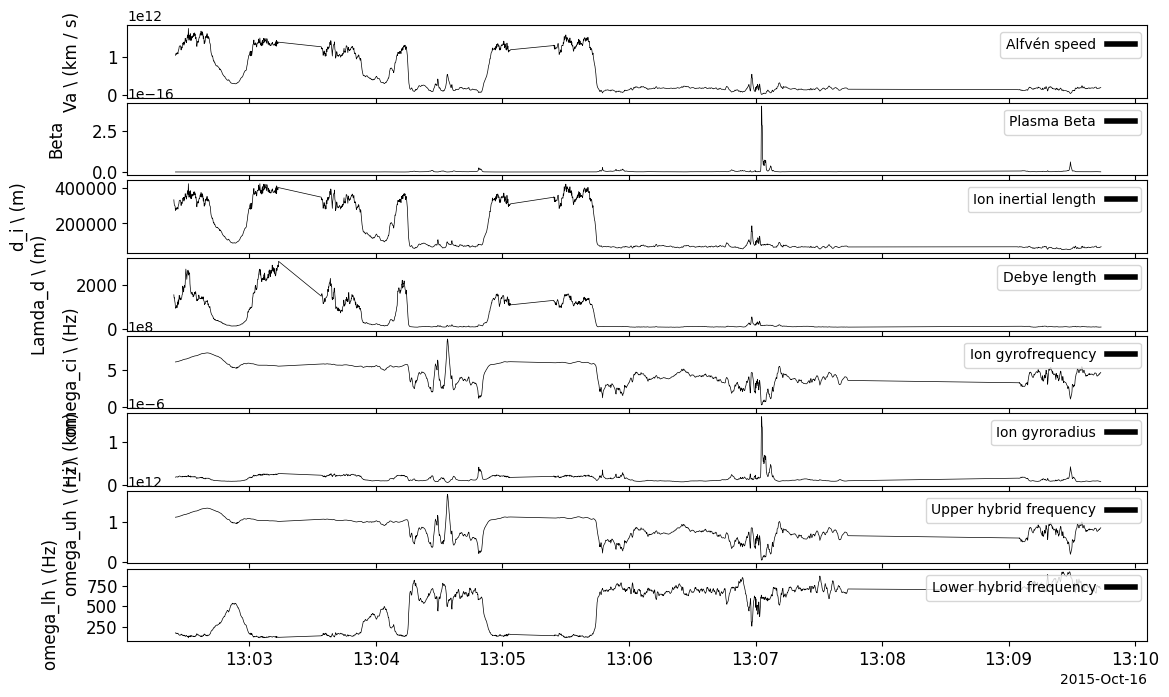

In [30]:
from pytplot import tplot
tplot(['alfven_speed',
       'plasma_beta',
       'ion_inertial_length',
       'debye_length',
       'omega_ci',
       'ion_gyroradius',
       'omega_uh',
       'omega_lh'])